# Python Pathlib

This module offers classes and tools that facilitate the interaction with the filesystem

Pathlib has two kind of paths, a) **pure paths** that you use them if you want to manipulate for example windows paths on a Unix machine (or vice verca), that means, manipulate paths without actually accessing the OS and b) **concrete paths** which inherit from pure paths and provide OS operations, that is you can't instantiate a `WindowsPath` when running on Unix machine.

In other words, you cannot instantiate a `WindowsPath` when running on Unix machine, but you can instantiate `PureWindowsPath` because with pure paths, we do not access the OS.

Most likely the `pathlib.Path` is the class that you are going to use to manipulate paths, that creates a **concrete path** that is either a `PosixPath` or a `WindowsPath`, depending on your system

In [3]:
# import the Path class and the pathlib library
from pathlib import Path
import pathlib

In [4]:
# let's create a variable with a path to manipulate later
mypath = 'c:/Users/User/Desktop/zipped_file.tar.gz'

In [5]:
# insert your path into the Path class and get a "concrete" pathlib path
pathlib_path = Path(mypath)
pathlib_path # i am on windows so it gives a concrete WindowsPath

WindowsPath('c:/Users/User/Desktop/zipped_file.tar.gz')

In [6]:
# you can also instantiate a Pure path with pathlib.PurePath() but we will not use it in this tutorial
pathlib.PurePath(mypath)

PureWindowsPath('c:/Users/User/Desktop/zipped_file.tar.gz')

In [8]:
# get the current working directory
Path.cwd()
print()

One thing that facilitates the path manipulation using pathlib is accessing its sub-parts:

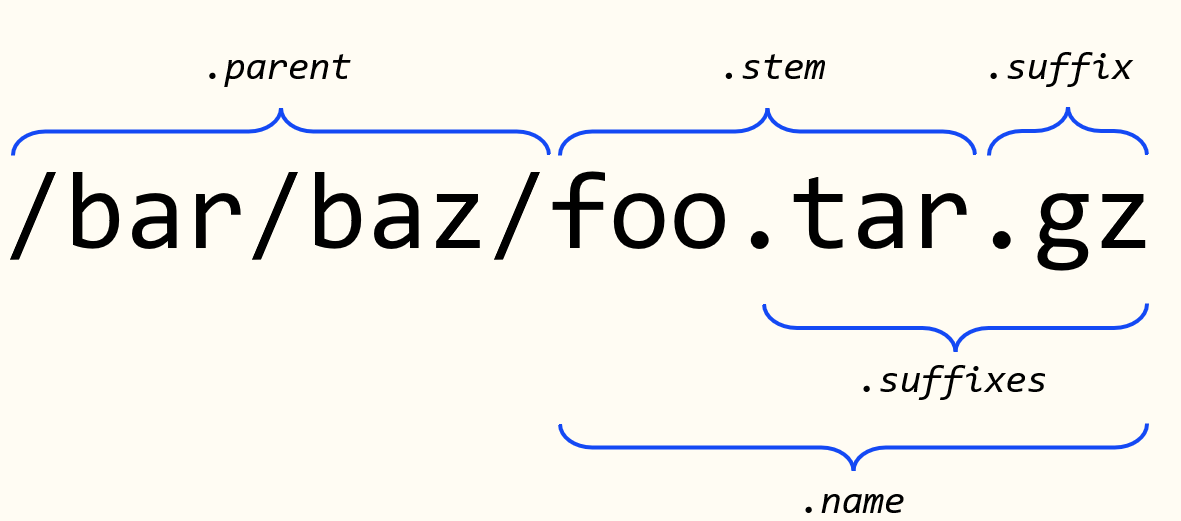

In [10]:
# get all the sub-parts of the path just with a dot operation
print(pathlib_path)
print(20*'--')
print('pathlib_path.parent  -->  ', pathlib_path.parent)
print('pathlib_path.name  -->  ', pathlib_path.name)
print('pathlib_path.stem -->  ', pathlib_path.stem)
print('pathlib_path.suffix -->  ', pathlib_path.suffix)
print('pathlib_path.suffixes -->  ', list(pathlib_path.suffixes))

c:\Users\User\Desktop\zipped_file.tar.gz
----------------------------------------
pathlib_path.parent  -->   c:\Users\User\Desktop
pathlib_path.name  -->   zipped_file.tar.gz
pathlib_path.stem -->   zipped_file.tar
pathlib_path.suffix -->   .gz
pathlib_path.suffixes -->   ['.tar', '.gz']


In [18]:
# in addition to the previous operations you can also
# get each of the parents individually using .parents and
# split the path into parts and get its parts seperately
print('--- pathlib_path.parents ---')
print(list(pathlib_path.parents)) # convert it to list to get them
print()
print('--- pathlib_path.parts ---')
print(list(pathlib_path.parts))

--- pathlib_path.parents ---
[WindowsPath('c:/Users/User/Desktop'), WindowsPath('c:/Users/User'), WindowsPath('c:/Users'), WindowsPath('c:/')]

--- pathlib_path.parts ---
['c:\\', 'Users', 'User', 'Desktop', 'zipped_file.tar.gz']


In [19]:
# convert the windows path into a posix path (Return a string 
# representation of the path with forward slashes (/))
print('pathlib_path as a windows path: ', pathlib_path)
print('pathlib_path as a posix path: ', pathlib_path.as_posix())


pathlib_path as a windows path:  c:\Users\User\Desktop\zipped_file.tar.gz
pathlib_path as a posix path:  c:/Users/User/Desktop/zipped_file.tar.gz


In [20]:
# return a new path with the name changed (new name is "another_name.txt")
print('Before: ', pathlib_path)
print('After: ', pathlib_path.with_name('another_name.txt'))

Before:  c:\Users\User\Desktop\zipped_file.tar.gz
After:  c:\Users\User\Desktop\another_name.txt


In [22]:
# return a new path with the stem changed (new stem is "another_stem")
print('Before: ', pathlib_path)
print('After: ', pathlib_path.with_stem('another_stem'))
# take a note here that here the stem changes and NOT the suffix, that is 
# the extension remains the same (.gz) but the rest of it (zipped_file.tar)
# changes to another_stem

Before:  c:\Users\User\Desktop\zipped_file.tar.gz
After:  c:\Users\User\Desktop\another_stem.gz


In [24]:
# return a new path with the suffix changed (new suffix is ".py")
print('Before: ', pathlib_path)
print('After: ', pathlib_path.with_suffix('.py'))

Before:  c:\Users\User\Desktop\zipped_file.tar.gz
After:  c:\Users\User\Desktop\zipped_file.tar.py


In [20]:
# Return a new path object representing the user’s home directory
Path.home()
print()
# this is the "~" in the unix terminal

In [30]:
# check if the path exists (in my case it doesn't)
# returns True / False
pathlib_path.exists()
print()

False

In [21]:
# check if the path is a file
pathlib_path.is_file()

False

In [22]:
# check if the path is a folder
pathlib_path.is_dir()

False

In [26]:
# loop through the contents of a folder (here we will use the current path
# as the folder to loop through its items
contents = Path.cwd().iterdir() # it returns a generator object to loop
for cont in contents:
    # it will return the ABSOLUTE (whole) path of each item in 
    # the folder as a concrete path!!
    # print(cont)
    pass

In [40]:
# we can do the same as above but using the glob wildcards (check the Python glob.glob)
folder_path = Path.cwd()

# get all the .txt files in the path specified by folder_path
for elem in folder_path.glob('*.txt'): 
    # print(elem)
    pass

# get all the .txt files recursively in the folder_path
for elem in folder_path.glob('./**/*.txt'):
    # print(elem)
    pass

In [28]:
# use the forward slash to join multiple paths together (you need to have at least one 
# pathlib.Path path)
print(
    Path('c:/Users/User') / 'Desktop/myfile.txt' # one pathlib path, one string
)
print(
    'c:/Users/User' / Path('Desktop/myfile.txt') # one string, one pathlib path
)
print(
    Path('c:/Users/User') / Path('Desktop/myfile.txt') # two pathlib paths
)

c:\Users\User\Desktop\myfile.txt
c:\Users\User\Desktop\myfile.txt
c:\Users\User\Desktop\myfile.txt


In [29]:
# however this will give an error
print('c:/users/User' / 'Desktop/myfile.txt')
# you need to have at least one pathlib path between the str objects

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [55]:
# create a directory from a pathlib path

# let's create a folder in the current path called random_folder
pathlib_path_folder = Path.cwd() / 'random_folder' # initialize the pathlib path

pathlib_path_folder.mkdir(exist_ok=False, parents=False) # create the folder with a simple dot
# operation

# If exist_ok is true, FileExistsError exceptions will be ignored 
# If parents is true, any missing parents of this path are created as needed

In [51]:
# open a file to read and write in the current working directory

# open the random_file.txt to write to
file_to_write = Path().cwd() / 'random_file.txt' # initialize the pathlib path
with file_to_write.open(mode='w') as fw: # open it again with a single dot operation
    fw.write('hello world!')
    

In [54]:
# not let's read it
with file_to_write.open(mode='r') as fr:
    print(fr.read())

hello world!


In [56]:
# create an empty file in the current directory using touch()
empty_file = Path().cwd() / 'an_empty_file.txt'
empty_file.touch()

In [60]:
# remove the random_folder that we created earlier
pathlib_path_folder.rmdir()